In [29]:
import requests
import json
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import os
import webbrowser
import folium
from folium import plugins
from scipy import stats

from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [30]:
seoul =  pd.read_csv("서울시_5대범죄.csv",encoding="utf-8")
df = pd.read_csv("building_type_count.csv",encoding="utf-8")

In [31]:
seoul.sort_values(by="지역구")

,기간,지역구,살인,강도,강간강제추행,절도,폭력,5대범죄
72,2019,강남구,5,5,666,2970,3658,7304.0
47,2018,강남구,10,14,600,3004,3885,7513.0
22,2017,강남구,7,20,607,3130,3956,7720.0
74,2019,강동구,6,15,180,1650,2163,4014.0
49,2018,강동구,3,7,170,1515,2224,3919.0
...,...,...,...,...,...,...,...,...
1,2017,중구,1,9,267,1846,2061,4184.0
51,2019,중구,2,6,195,2202,1922,4327.0
6,2017,중랑구,5,3,172,1533,2858,4571.0
56,2019,중랑구,10,4,138,1666,2450,4268.0


In [32]:
seoul_avg = seoul.groupby("지역구").mean()

In [5]:
del seoul_avg["기간"]
del seoul_avg["살인"]
del seoul_avg["강도"]
del seoul_avg["강간강제추행"]
del seoul_avg["절도"]
del seoul_avg["폭력"]


In [6]:
seoul_avg

,5대범죄
지역구,
강남구,7512.333333
강동구,4064.666667
강북구,3556.000000
강서구,4896.000000
관악구,5293.000000
광진구,4190.666667
구로구,4804.000000
금천구,3221.000000
노원구,4123.000000


In [7]:
df.set_index = df.용도
building = df.pivot("지역구","용도","주용도")

In [8]:
building[["기타","사무","상가"]].sum()

용도
기타     28817
사무      8869
상가    120308
dtype: int64

In [9]:
pdf = pd.pivot_table(df,index="지역구",columns="용도",values="주용도",aggfunc="sum")

In [10]:
pdf

용도,기타,사무,상가,주거
지역구,,,,
강남구,1383,1724,8137,13348
강동구,921,209,3279,15929
강북구,763,84,3634,22677
강서구,1668,439,3985,20000
관악구,1206,493,5570,25181
광진구,832,218,3919,20344
구로구,1363,232,3575,17947
금천구,1403,184,2163,11806
노원구,1111,85,2718,9631


In [11]:
pdf["주거비율"] = pdf.주거/pdf.sum(axis=1)*100
pdf

용도,기타,사무,상가,주거,주거비율
지역구,,,,,
강남구,1383,1724,8137,13348,54.277814
강동구,921,209,3279,15929,78.321369
강북구,763,84,3634,22677,83.500258
강서구,1668,439,3985,20000,76.651847
관악구,1206,493,5570,25181,77.599384
광진구,832,218,3919,20344,80.369770
구로구,1363,232,3575,17947,77.635506
금천구,1403,184,2163,11806,75.893546
노원구,1111,85,2718,9631,71.103728


In [12]:
pdf.sort_values(by="지역구",ascending=True,inplace=True)
pdf.index

Index(['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구',
       '용산구', '은평구', '종로구', '중구', '중랑구'],
      dtype='object', name='지역구')

In [13]:
final1 = pd.concat([pdf,seoul_avg],axis=1)
final

NameError: name 'final' is not defined

In [15]:
del final1["기타"]
del final1["사무"]
del final1["상가"]
del final1["주거"]

In [16]:
final1

,주거비율,5대범죄
지역구,,
강남구,54.277814,7512.333333
강동구,78.321369,4064.666667
강북구,83.500258,3556.000000
강서구,76.651847,4896.000000
관악구,77.599384,5293.000000
광진구,80.369770,4190.666667
구로구,77.635506,4804.000000
금천구,75.893546,3221.000000
노원구,71.103728,4123.000000


In [17]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [18]:
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')

In [19]:
final1.reset_index(inplace=True)

In [20]:
final1.sort_values(by="주거비율",ascending=False,inplace=True)

In [23]:
final1.to_csv('주거.csv', sep=',', na_rep='NaN')

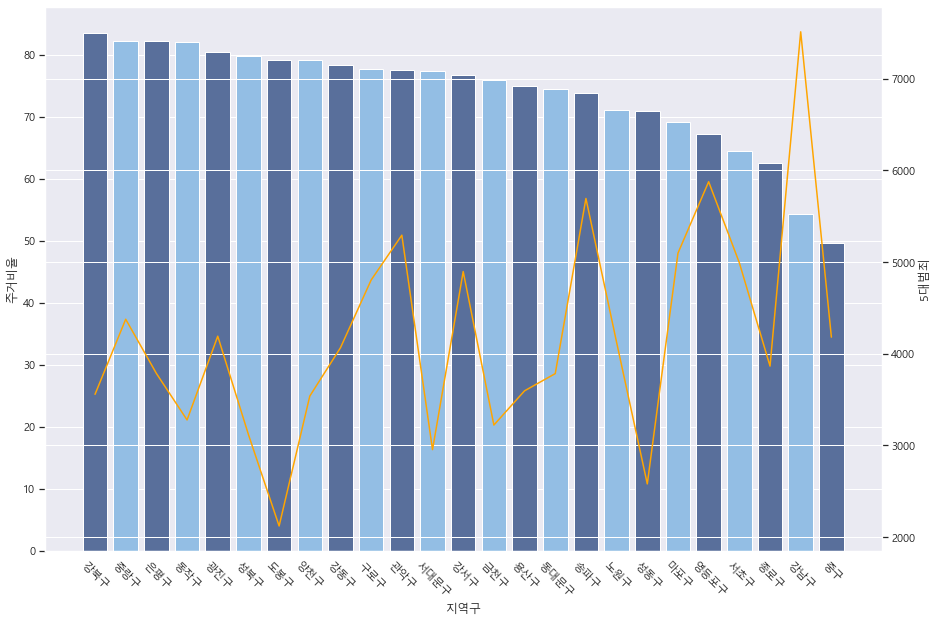

In [27]:
fig,axe1 = plt.subplots()
plt.xticks(rotation = - 45 )
axe2 = axe1.twinx()
colors = ["#4E6BA6","#85BFF2"]
palette = sns.color_palette(colors)
sns.set(rc = {'figure.figsize':(15,10)})
sns.set(font='Malgun Gothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')
# sns.set_theme(style="whitegrid")
# final1 = sns.load_dataset("final1")
sns.barplot(ax=axe1,x="지역구",y="주거비율",data=final1,palette =palette )
sns.lineplot(ax=axe2,x="지역구",y="5대범죄",data=final1,color="orange")

plt.savefig('living.png')


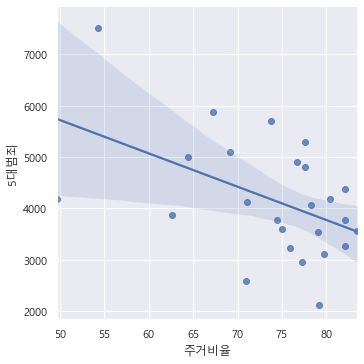

In [54]:
sns.lmplot(x="주거비율",y="5대범죄",y_jitter=0.03, data=final1)